In [1]:
import numpy as np
import matplotlib.pylab as plt

# Základní operace s časovou řadou

V tomto příkladu použijeme časovou řadu popisující měsíční počet narozených dětí v New Yorku od ledna 1946 do prosince 1959. Tato řada je uložena v souboru 'nybirths.dat'.

**Úkol 1: načtěte do proměnné `data` soubor nybirths.dat jako numpy array a vytiskněte prvních 20 hodnot.**

In [16]:
fn = 'nybirths.dat'
data = np.loadtxt(fn)
data[:20]

array([26.663, 23.598, 26.931, 24.74 , 25.806, 24.364, 24.477, 23.901,
       23.175, 23.227, 21.672, 21.87 , 21.439, 21.089, 23.709, 21.669,
       21.752, 20.761, 23.479, 23.824])

**Úkol 2: zjistěte, kolik hodnot je v řadě uloženo.**

In [9]:
len(data)
int(data[1])

23

**Úkol 3: vykreslete průběh časové řady a diskutujte její pravděpodobné vlastnosti.**

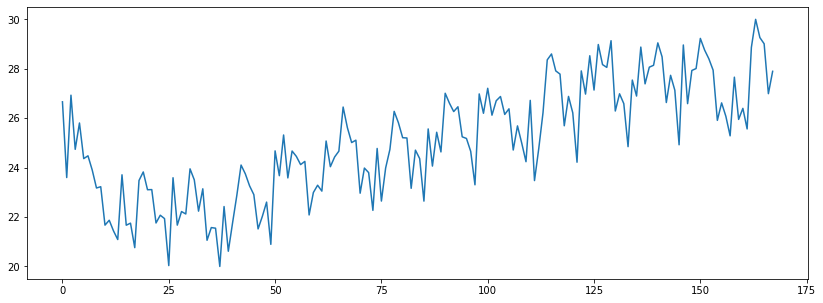

In [11]:
plt.figure(figsize=(14,5))
plt.plot(data)
plt.show()

**Úkol 4: rozložte časovou řadu na trend a další složky. Rozhodněte, který model - zda multiplikativní či aditivní - lépe odpovídá.**

/home/sutymate/anaconda3/envs/PDD/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Suma kvadrátů reziduí ACF: 1.4236733154190764


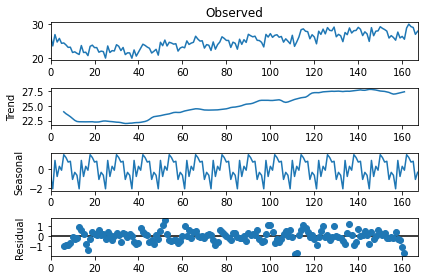

In [12]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf

result = seasonal_decompose(data, period=12, model='additive')
resid_acf = acf(result.resid, nlags=10, missing='drop')
sum_of_squares_resid_acf = np.sum(resid_acf**2)
print('Suma kvadrátů reziduí ACF:', sum_of_squares_resid_acf)

result.plot()
plt.show()

**Úkol 5: Odstraňte trend z časové řady a vykreslete výsledek.**

In [14]:
result.trend

array([        nan,         nan,         nan,         nan,         nan,
               nan, 23.98433333, 23.662125  , 23.42333333, 23.161125  ,
       22.86425   , 22.54520833, 22.3535    , 22.30870833, 22.30258333,
       22.29479167, 22.29354167, 22.305625  , 22.33483333, 22.31166667,
       22.26279167, 22.25795833, 22.27766667, 22.354     , 22.430375  ,
       22.43666667, 22.38720833, 22.35241667, 22.32458333, 22.27458333,
       22.23754167, 22.219875  , 22.16983333, 22.07720833, 22.01395833,
       22.02604167, 22.06375   , 22.08033333, 22.13316667, 22.16604167,
       22.17541667, 22.21341667, 22.27625   , 22.3575    , 22.488625  ,
       22.70991667, 22.985625  , 23.16345833, 23.216625  , 23.26966667,
       23.33491667, 23.42679167, 23.506375  , 23.57016667, 23.638875  ,
       23.757125  , 23.86354167, 23.89533333, 23.87341667, 23.8815    ,
       24.00083333, 24.1235    , 24.20916667, 24.28208333, 24.3545    ,
       24.43241667, 24.49495833, 24.48379167, 24.43879167, 24.36

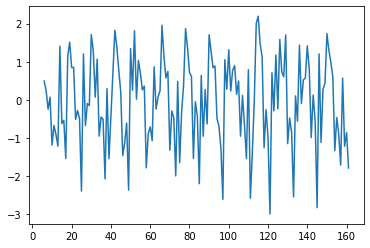

In [15]:
detrended = data - result.trend
plt.plot(detrended)